<a href="https://colab.research.google.com/github/gonzalezzayra/INVESTIGACION-DE-OPERACIONES/blob/main/Tablero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tablero**

----



Lanzamos dos monedas y avanzamos en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento.

¿Son todos los sectores igualmente probables cuando pase mucho tiempo?

La variable de estado es la posición de la ficha

$$\{ \text{verde, rojo, naranja, azul} \}$$

Los posibles estados en las monedas:

$$\text{CC,CX,XC,XX}$$

Cada unas de las probabilidades:

\begin{align*}
\text{La probabilidad de CC es } &\frac{1}{4} \\
\text{La probabilidad de CX es } &\frac{1}{2} \\
\text{La probabilidad de XC es } &\frac{1}{2} \\
\text{La probabilidad de XX es } &\frac{1}{4}
\end{align*}

Denotemos por

$$x_n \text{ a la probabilidad de estar en el sector naranja tras } n \text{ lanzamientos}$$

$$y_n \text{ a la probabilidad de estar en el sector azul tras } n \text{ lanzamientos}$$

$$z_n \text{ a la probabilidad de estar en el sector verde tras } n \text{ lanzamientos}$$

$$t_n \text{ a la probabilidad de estar en el sector rojo tras } n \text{ lanzamientos}$$

Analizamos la situación para $n=1$

$$x_1 = \frac{1}{4} x_0 + 0\cdot y_0 + \frac{1}{4} \cdot z_0 + \frac{2}{4}\cdot t_0 $$

$$y_1 = \frac{2}{4} x_0 + \frac{1}{4}\cdot y_0 + 0 \cdot z_0 + \frac{1}{4}\cdot t_0 $$

$$z_1 = \frac{1}{4} x_0 + \frac{2}{4}\cdot y_0 + \frac{1}{4} \cdot z_0 + 0 \cdot t_0 $$

$$t_1 = 0\cdot x_0 + \frac{1}{4}\cdot y_0 + \frac{2}{4} \cdot z_0 + \frac{1}{4}\cdot t_0 $$

Para $n=2$

$$x_2 = \frac{1}{4} x_1 + 0\cdot y_1 + \frac{1}{4} \cdot z_1 + \frac{2}{4}\cdot t_1 $$

$$y_2 = \frac{2}{4} x_1 + \frac{1}{4}\cdot y_1 + 0 \cdot z_1 + \frac{1}{4}\cdot t_1 $$

$$z_2 = \frac{1}{4} x_1 + \frac{2}{4}\cdot y_1 + \frac{1}{4} \cdot z_1 + 0 \cdot t_1 $$

$$t_2 = 0\cdot x_1 + \frac{1}{4}\cdot y_1 + \frac{2}{4} \cdot z_1 + \frac{1}{4}\cdot t_1 $$

En general:



$$
\begin{pmatrix} X_n \\ Y_n \\ Z_n \\ T_n \end{pmatrix} = \begin{pmatrix} \frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\ \frac{2}{4}& \frac{1}{4} & 0 & \frac{1}{4} \\ \frac{1}{4} & \frac{2}{4} & \frac{1}{4} & 0 \\ 0 & \frac{1}{4} & \frac{2}{4} & \frac{1}{4} \end{pmatrix}  \begin{pmatrix} X_{n-1} \\ Y_{n-1} \\ Z_{n-1} \\ T_{n-1} \end{pmatrix}
$$

Simplificando:

$$X_n = A\cdot X_{n-1} = A^2\cdot X_{n-2} = ... = A^n\cdot X_{0}$$

Entonces se tiene que resolver $A^n$

**Matriz de transición**

$$
P = \begin{bmatrix}
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4}
\end{bmatrix}
$$

Como en Jacobi, obtenemos un vector inicial

$$(x_0, y_0, z_0, t_0)$$

Entonces:

$$x_0 = 1, y_0 = 0, z_0 = 0, t_0 = 0 $$

Elegimos esto para decir que empieza en Naranja.

Se podría poner esto para decir que hay un 50% de probabilidad que este en Naranja o en Azul.

$$x_0 = 0.5, y_0 = 0.5, z_0 = 0, t_0 = 0 $$

**Calcular $A^n$**

Aquí se elevo multiplico por la misma matriz, para notar el cambio que hay

In [157]:
import numpy as np

#Define la matriz de 4x4

matriz_a = np.array([[0.25, 0, 0.25, 0.5],
                     [0.5, 0.25, 0, 0.25],
                     [0.25, 0.5, 0.25, 0],
                     [0, 0.25, 0.5, 0.25]])

res = np.dot(matriz_a, matriz_a)
print(res)

[[0.125 0.25  0.375 0.25 ]
 [0.25  0.125 0.25  0.375]
 [0.375 0.25  0.125 0.25 ]
 [0.25  0.375 0.25  0.125]]


Elevamos la matriz hasta que todas su entradas fueran 0.25, fue hasta que la elevamos a 27, donde se obtuvo que todas las entradas tuvieran 0.25

In [158]:
#Para comparar
x = 27 #Aquí es donde todas las entradas son 0.25

#Eleva la matriz a la potencia n
matriz_potencia = np.linalg.matrix_power(matriz_a, x)

print(matriz_potencia)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


Entonces se cumple que después todas las entradas tendrán $\frac{1}{4}$, siendo que la probabilidad de cada una de las entradas será de $\frac{1}{4}$, al sumar la entrada de una de las filas tiene que dar $1$.

In [159]:
#Importar las librerias
import matplotlib.pyplot as plt
import numpy as np

In [160]:
#Condiciones iniciales para x0, y0, z0 y t0
x = 1
y = 0
z = 0
t = 0
n = 15 #Número de lanzamientos, puede ser más alto o más bajo

In [161]:
#Creamos listas para cada uno, x,y, z y t
x_i = []
y_i = []
z_i = []
t_i = []

#Hacer un ciclo for para iterar los valores de xi, yi, zi y ti
for i in range(n):
  xi = 0.25*x + 0*y + 0.25*z + 0.5*t
  yi = 0.5*x + 0.25*y + 0*z + 0.25*t
  zi = 0.25*x + 0.5*y + 0.25*z + 0*t
  ti = 0*x + 0.25*y + 0.5*z + 0.25*t
  #Adjuntar a una lista cada valor de xi,yi,zi y ti
  x_i.append(xi)
  y_i.append(yi)
  z_i.append(zi)
  t_i.append(ti)
  #Actualizar las variables
  x = xi
  y = yi
  z = zi
  t = ti

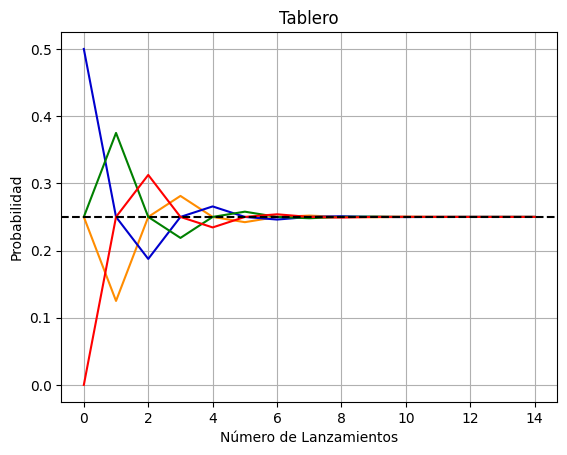

In [162]:
#Gráfica
plt.plot(x_i, color = 'darkorange',label = "Naranja") #Sector Naranja
plt.plot(y_i, color = 'mediumblue', label = 'Azul') #Sector Azul
plt.plot(z_i, color = 'green', label = "Verde" ) #Sector Verde
plt.plot(t_i, color = 'red', label = "Rojo") #Sector Rojo

plt.axhline(y=0.25, color='black', linestyle='--') #Para poner una linea que este en 1/4, para ver cuando se aproxima
plt.title('Tablero') #Titulo de la gráfica Tablero
plt.xlabel('Número de Lanzamientos') #Eje x
plt.ylabel('Probabilidad') #Eje y
plt.grid(True)
plt.show()